<a href="https://colab.research.google.com/github/ISHAN-SINGH-KARNAVAT/Amazon-Shopping-Dashboard/blob/main/Attendance_System_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things**

![Subscribe](https://media3.giphy.com/media/XGILFirobxDWglaUyj/giphy.gif?cid=ecf05e474afdd7ef5fe2c0fa50f87822d705fbb2613a3b5c&rid=giphy.gif)

In [1]:
!git clone https://github.com/misbah4064/face_recognition.git
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Receiving objects: 100% (26/26), 3.03 MiB | 20.70 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/face_recognition


In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=4980b9cb2e00b71e1c5594656a3d9ef5644eeec53199c5c4bf6938c0f8be4e46
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# **Training Images**

In [3]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Donald Trump.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("jeffbezos.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]
known_face_names = [
    "Elon Musk",
    "Donald Trump",
    "Jeff Bezos"
]
print("Done learning and creating profiles")

Done learning and creating profiles


# **Initializing function to add names to the "attendance_list.csv" file**

In [8]:
def makeAttendanceEntry(name):
    with open('attendance_list.csv','r+') as f:
        allLines = f.readlines()
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

# **Performing Face Recognition and Entering Attendance with time-stamp**

Unknown


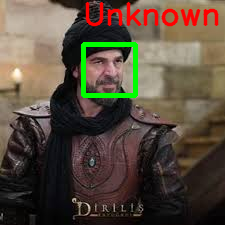

In [10]:
file_name = "unknown_er.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)